# Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special
import re

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 77408 bytes to pyBspline.py


# Periodic Bspline

In [92]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=10 #base caridnality
xmin = 0.0
xmax = 1.0

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)

kv = Bs.periodic_kv(xmin,xmax,p=P,n=N)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

polinomial degree :  1
base caridnality  :  12
knots             :  [-0.09090909  0.          0.09090909  0.18181818  0.27272727  0.36363636
  0.45454545  0.54545455  0.63636364  0.72727273  0.81818182  0.90909091
  1.          1.09090909]


In [93]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [94]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [95]:
#
NN = 1000
T = np.linspace(xmin,xmax,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

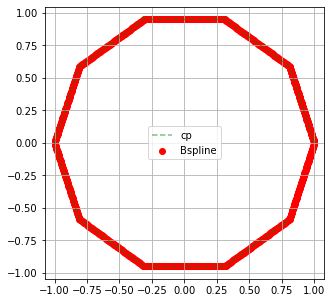

In [96]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "red",label="Bspline")
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
#plt.quiver( xy[index] , arrow[index] ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

In [97]:
der = bs.derivative()
arrow = der.evaluate(T)

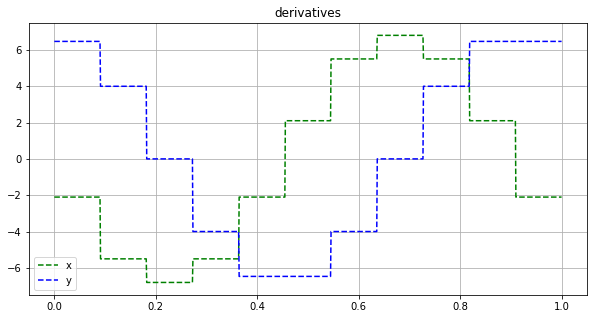

In [98]:
#grafico
plt.figure ( 0 , figsize = ( 10 , 5 ) )
   
#converto in dataframe    
plt.plot(T,arrow[:,0],color="green",label="x",linestyle="--",alpha=1)
plt.plot(T,arrow[:,1],color="blue",label="y",linestyle="--",alpha=1)
plt.legend()
plt.grid(True)
plt.title("derivatives")
plt.show()

# Hankel and Bessel functions

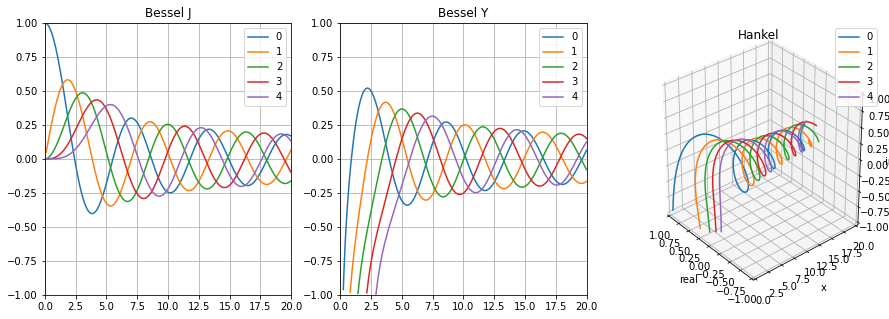

In [2]:
#
orders = [0,1,2,3,4]
t  = np.linspace(0.1,20,1000)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(131)  
for i in orders:
    B1 = scipy.special.jv(i,t)
    B1[B1<-1] = np.nan
    ax.plot(t, B1 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel J")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(132)  
for i in orders:
    B2 = scipy.special.yv(i,t)    
    B2[B2<-1] = np.nan
    ax.plot(t, B2 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel Y")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(133, projection='3d')  
for i in orders:
    H  = scipy.special.hankel1(i,t)
    Hr = H.real
    Hi = H.imag
    Hr[Hr<-1] = np.nan
    Hi[Hi<-1] = np.nan
    ax.plot(Hr, t, Hi ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Hankel")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,20)
ax.set_zlim3d(-1,1)
ax.set_xlabel( "real" )
ax.set_ylabel( "x" )
ax.set_zlabel( "imag" )
ax.invert_xaxis()
ax.view_init(elev=30, azim=-40)
plt.grid(True)
plt.legend()


#h = scipy.special.jv(i,t) + I*scipy.special.yv(i,t)
#H = scipy.special.hankel1(i,t)
#np.nanmean(np.absolute(h-H))

plt.show()

# BEM

## Basis function

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=20 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

In [3]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [5]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

Finished/ 20


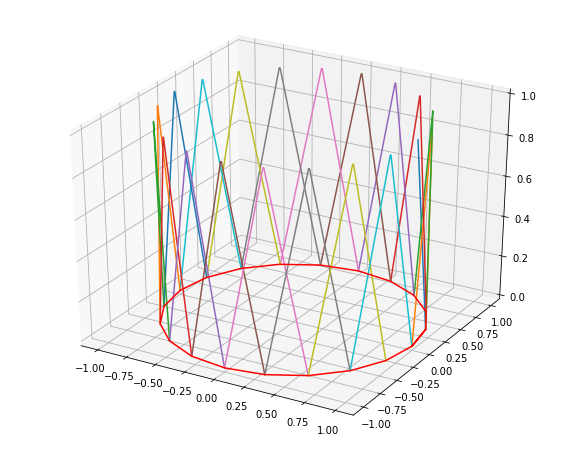

In [6]:
fig = plt.figure ( 0 , figsize = ( 10, 8 ) )

bsCopy = bs.copy()
bsCopy.clear_cp()
bsScal = bsCopy._scalar()
br = bs.basis_range()

#
#s = 0.2
ax = fig.add_subplot(111, projection='3d')

for i in range(N):
    print(i+1,"/",N,end="\r")
    u = np.linspace(br.at[(i,),("min",0)],br.at[(i,),("max",0)],100)
    #u = np.linspace(0,1,1000,endpoint=True)
    bsCopy.set_cp(i,bs.get_cp(i))
    bsScal.set_cp(i,1.)
    xyB = bs.evaluate(u)
    zB = bsScal.evaluate(u)
    
    #xyB = xyB[zB != 0]
    #zB  = zB[zB != 0]
    
    #xyB,zB = [ i,j for i,j in zip(xyB,zB) if j != 0.0 ]
    
    ax.plot(xyB[:,0], xyB[:,1],zB,label=str(i))
    
    bsCopy.set_cp(i,[0,0])
    bsScal.set_cp(i,0.)
    
print("Finished")

ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
ax.set_zlim(0,1)
plt.grid(True)
#plt.legend()
plt.show()

## Circle

### Definition

In [2]:
k_in = np.asarray([10.0,0.0])
wavevector = np.sqrt(np.sum(np.power(k_in,2.0)))
I = np.complex(0,1)

xmin = -5
xmax = 5.
ymin = -2
ymax = 2

In [3]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=100 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

In [4]:
file_dir = "files/BEM/circle/"
suffix = "P="+str(P)+"-N="+str(N)+"-k="+str(wavevector)+".csv"

In [5]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t+np.pi/2)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t+np.pi/2)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [6]:
t = np.linspace(0,1,N)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

### Geometry

In [7]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

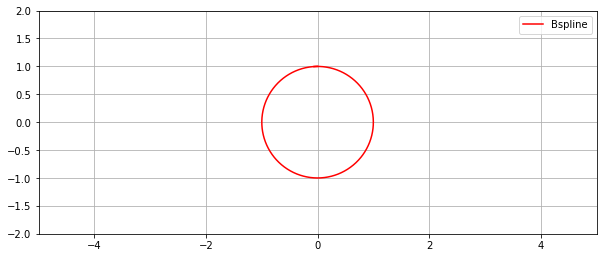

In [8]:
#grafico
fig = plt.figure ( 0 , figsize = ( 10, 5 ) )
   
#converto in dataframe    
ax = fig.add_subplot(111)
#plt.plot(cpx,cpy,color="green",label="cp",linestyle="--")
#plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
plt.grid()
plt.legend()
ax.set_aspect('equal')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

### Stiffness Matrix

In [9]:
file = file_dir+"stiffness_matrix-"+suffix
file

'files/BEM/circle/stiffness_matrix-P=1-N=30-k=10.0.csv'

In [10]:
#
READ = False
SAVE = True
if os.path.exists(file) and READ == True :
    sm = bs.load("sm-BEM",file)
else :
    sm = bs.stiffness_matrix_BEM(k=wavevector,\
                                 opts={"print":True,"delta":[20],"ready_sm_BEM":False})
    if SAVE == True :
        bs.save("sm-BEM",file)
#sm

In [11]:
#
sm2 = sm.copy()
sm2["index"] = sm2.index
#
new = sm2.melt(id_vars=['index'])# = sm.index
#
new2 = new.copy()
new2["index"] = [ i[0] for i in new2["index"]]
new2["variable"] = [ i[0] for i in new2["variable"]]
#new2["value"] = [np.complex(i) for i in new2["value"] ]
new2["real"] = np.real(new2["value"])
new2["imag"] = np.imag(new2["value"])
new2["abs"] = np.absolute(new2["value"])
new2["phase"] = np.angle(new2["value"])/np.pi
df = new2

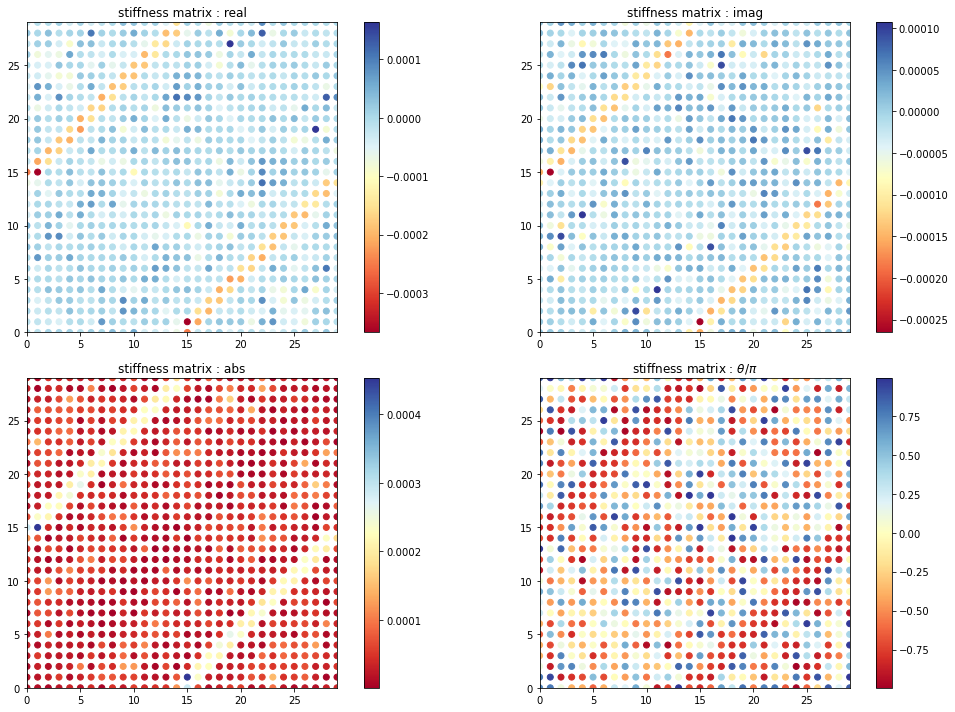

In [12]:
#
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

cmap = 'RdYlBu'


#
ax = fig.add_subplot(221)
sc = ax.scatter(df["index"],df["variable"],c=df["real"],cmap = 'RdYlBu')
plt.colorbar(sc)
plt.xlim(min(df["index"]),max(df["index"]))
plt.ylim(min(df["index"]),max(df["index"]))
ax.set_aspect('equal')
plt.title("stiffness matrix : real")

#
ax = fig.add_subplot(222)
sc = ax.scatter(df["index"],df["variable"],c=df["imag"],cmap = 'RdYlBu')
plt.colorbar(sc)
plt.xlim(min(df["index"]),max(df["index"]))
plt.ylim(min(df["index"]),max(df["index"]))
ax.set_aspect('equal')
plt.title("stiffness matrix : imag")

#
ax = fig.add_subplot(223)
sc = ax.scatter(df["index"],df["variable"],c=df["abs"],cmap = 'RdYlBu')
plt.colorbar(sc)
plt.xlim(min(df["index"]),max(df["index"]))
plt.ylim(min(df["index"]),max(df["index"]))
ax.set_aspect('equal')
plt.title("stiffness matrix : abs")

#
ax = fig.add_subplot(224)
sc = ax.scatter(df["index"],df["variable"],c=df["phase"],cmap = 'RdYlBu')
plt.colorbar(sc)
plt.xlim(min(df["index"]),max(df["index"]))
plt.ylim(min(df["index"]),max(df["index"]))
ax.set_aspect('equal')
plt.title("stiffness matrix : $\\theta / \pi$")

plt.tight_layout()
plt.savefig("non-per.png")
plt.show()

### Plane wave

In [13]:
def plot(fig,n,xB,yB,x,y,c,title,cmap):
    
    ax = fig.add_subplot(n)
    ax.plot(xB, yB, color= "black",label="Bspline")
    sc = ax.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar(sc)
    ax.set_aspect('equal')
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    plt.title(title)
    
    return

In [14]:
def plane_wave(xx): # soluzione
    xx = np.asarray(xx)
    theta = np.dot(xx,k_in)
    return np.exp(I*theta)

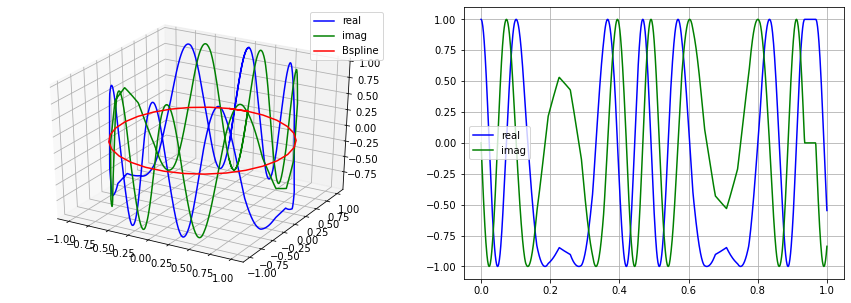

In [16]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
uinc = plane_wave(xy)

#
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#
#s = 0.2
ax = fig.add_subplot(121, projection='3d')
ax.plot(xy[:,0], xy[:,1],uinc.real,color="blue",label="real")
ax.plot(xy[:,0], xy[:,1],uinc.imag,color="green",label="imag")
ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(122)#, projection='3d')
ax.plot(T,uinc.real,color="blue",label="real")
ax.plot(T,uinc.imag,color="green",label="imag")
plt.grid(True)
plt.legend()

#
#ax = fig.add_subplot(133)#, projection='3d')
#ax.plot(T,somma.real,color="blue",label="real")
#ax.plot(T,somma.imag,color="green",label="imag")
#plt.grid(True)
#plt.legend()

plt.show()

In [17]:
Nx= int(xmax-xmin)*10
Ny = int(ymax-ymin)*5
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))

internal = bs.internal_points(XY=XY,NN=1000,xmin=0.,xmax=1.,opts=None)
XYslp = XY[ np.logical_not(internal) ]
#print(len(XYslp)," = ",len(XYslp)/3600,"h")

#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#tolgo elementi interni
#radius = np.asarray([np.sqrt(np.sum(np.power(i,2.0))) for i in XY])
#XYslp = XY#[radius > 1.0]
print(len(XYslp)," = ",len(XYslp)/3600,"h")

1852  =  0.5144444444444445 h


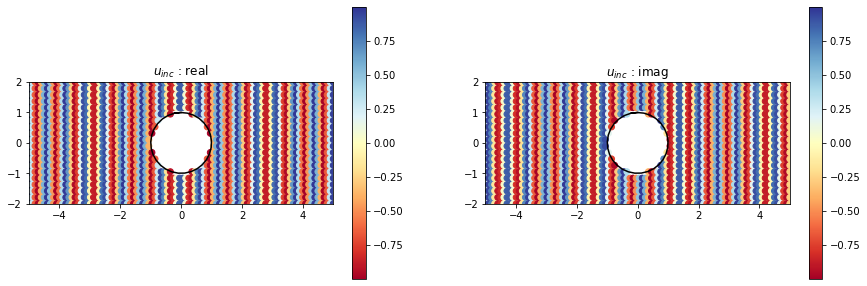

In [18]:
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

Uinc = plane_wave(XYslp)

cmap = 'RdYlBu'
    
plot(fig,121,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,122,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)

### Single Layer Potential basis

In [19]:
file = file_dir+"single_layer_potential-"+suffix
file

'files/BEM/circle/single_layer_potential-P=1-N=30-k=10.0.csv'

In [14]:
Nx= int(xmax-xmin)*5
Ny = int(ymax-ymin)*1
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))

internal = bs.internal_points(XY=XY,NN=1000,xmin=0.,xmax=1.,opts=None)
XYslp = XY[ np.logical_not(internal) ]
print(len(XYslp)," = ",len(XYslp)/3600,"h")

#tolgo elementi interni
#radius = np.asarray([np.sqrt(np.sum(np.power(i,2.0))) for i in XY])
#XYslp = XY#[radius > 1.0]
#print(len(XYslp)," = ",len(XYslp)*3/3600,"h")

184  =  0.051111111111111114 h


In [25]:
READ = False
SAVE = True
if os.path.exists(file) and READ == True :
    slp = bs.load("slp-BEM",file)
else :
    slp = bs.single_layer_potential_basis_BEM(XY=XYslp,k=wavevector,opts={"print":True})
    if SAVE == True :
        bs.save("slp-BEM",file)
#slp

Finished852


### Galerkin method

In [27]:
file_sol = file_dir+"solution-plane_wave-"+suffix
file_lv  = file_dir+"load_vector-plane_wave-"+suffix
file_ind = file_dir+"indirect_solution-plane_wave-"+suffix
print(file_sol)
print(file_lv)
print(file_ind)

files/BEM/circle/solution-plane_wave-P=1-N=30-k=10.0.csv
files/BEM/circle/load_vector-plane_wave-P=1-N=30-k=10.0.csv
files/BEM/circle/indirect_solution-plane_wave-P=1-N=30-k=10.0.csv


In [28]:
READ = False
SAVE = True
if os.path.exists(file_sol) and READ == True :
    sol,Xnp,Valnp = bs.load("sol-BEM",file_sol)
    
if os.path.exists(file_lv) and READ == True :
    bs.load("lv-BEM",file_lv)
    
if os.path.exists(file_ind) and READ == True :
    bs.load("ind_sol-BEM",file_ind)
    
else :
    sol,Xnp,Valnp = bs.BEM(uinc=plane_wave,k=wavevector,XY=XYslp,opts=None)
    if SAVE == True :
        bs.save("sol-BEM",file_sol)
        bs.save("lv-BEM",file_lv)
        bs.save("ind_sol-BEM",file_ind)
#sol

### Indirect solution

In [ ]:
ind_sol = bs.copy()
ind_sol.clear_cp()
ind_sol_cp = bs.indirect_solution_BEM()
for i in ind_sol_cp:
    ind_sol.set_cp(ind_sol_cp[0],ind_sol_cp[1])

In [ ]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)


#uinc = plane_wave(xy)

#
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#
#s = 0.2
ax = fig.add_subplot(121, projection='3d')
ax.plot(xy[:,0], xy[:,1],uinc.real,color="blue",label="real")
ax.plot(xy[:,0], xy[:,1],uinc.imag,color="green",label="imag")
ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(122)#, projection='3d')
ax.plot(T,uinc.real,color="blue",label="real")
ax.plot(T,uinc.imag,color="green",label="imag")
plt.grid(True)
plt.legend()

#
#ax = fig.add_subplot(133)#, projection='3d')
#ax.plot(T,somma.real,color="blue",label="real")
#ax.plot(T,somma.imag,color="green",label="imag")
#plt.grid(True)
#plt.legend()

plt.show()

### $u_{tot}$

In [29]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#
Uinc = plane_wave(XYslp)#.reshape(Nx,Ny).transpose()
total = Uinc + Valnp

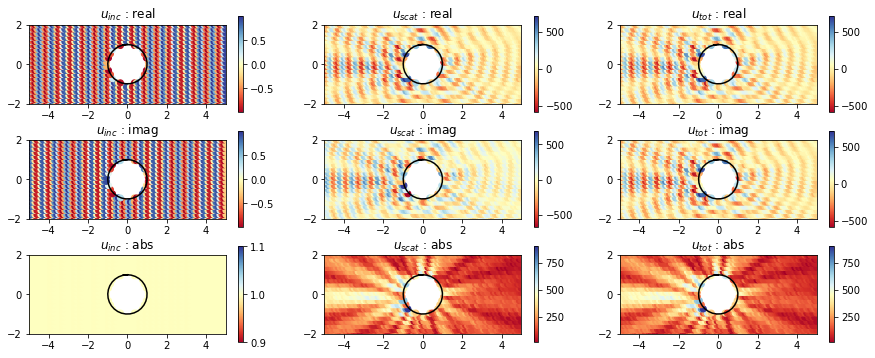

In [30]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 6 ) )

cmap = 'RdYlBu'
    
plot(fig,331,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,334,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)
plot(fig,337,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(Uinc),"$u_{inc}$ : abs",cmap)

plot(fig,332,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Valnp.real,"$u_{scat}$ : real",cmap)
plot(fig,335,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Valnp.imag,"$u_{scat}$ : imag",cmap)
plot(fig,338,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(Valnp),"$u_{scat}$ : abs",cmap)

plot(fig,333,df["x"], df["y"],XYslp[:,0],XYslp[:,1],total.real,"$u_{tot}$ : real",cmap)
plot(fig,336,df["x"], df["y"],XYslp[:,0],XYslp[:,1],total.real,"$u_{tot}$ : imag",cmap)
plot(fig,339,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(total),"$u_{tot}$ : abs",cmap)

plt.show()

- scelgo i punti in cui valutare la soluzione
- calcolo il valore della soluzione con $\psi_i$ al posto di $\psi$
- poi modificando $u_{inc}$ varierà $\psi$ ma potrò comunque sfruttare la matrice calcolata

- devo incrementare il numero di punti usati per calcolare la matrice di stiffness
- devo tener conto della periodicità nel domionio delle funzioni 
- devo tener conto che adesso il numero di funzioni di base è diverso da quello dei control points (perché alcuni sono periodici)
- creo una funzione che per ogni control point mi restituisce le funzioni di base associate, in questo modo posso riutilizzare le funzioni già scritte senza stravolgerle, devo però stare attento agli indici delle matrici

- ci sarebbe anche da riordinare il modo in cui salvo le varie matrici, sarebbe comodo usare un dict, in questo modo in ogni funzione posso usare la stessa porzione di codice variando soltanto alcuni parametri passati come stringhe

- devo creare delle Bspline periodiche
- l'ultimo control points non deve essere accessibile
- devo modificare le funzioni di approssimazione
- devo togliere dalle matrici le righe che corrispondono ai dof periodici dopo aver sommato il loro contributo agli altri dof
- sistemare solo la funzione approximate per adesso

- approximate
- edge
- Dirichlet_BC
- Galerkin

cioè solo le funzioni che vanno a modificare i control points della Bspline

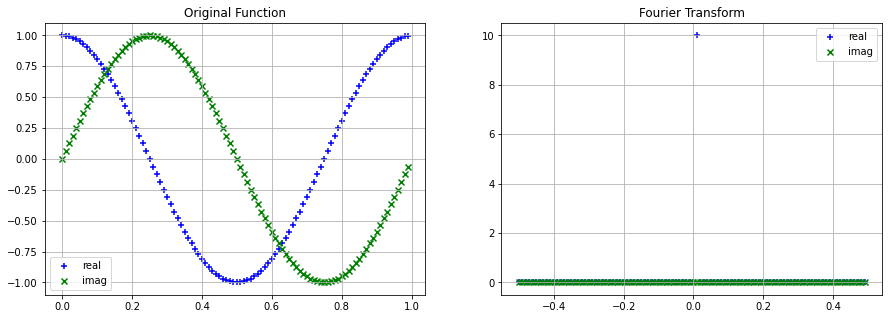

In [67]:
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

# number of signal points
N = 100
xmin = 0
xmax = 1

x = np.linspace(xmin,xmax , N, endpoint=False)
w = 1
y = np.exp(1.j * w * x * 2 * np.pi)# + np.exp(1.j * 3 * x * 2*np.pi)
yf = fft(y,norm="ortho")

xf = fftfreq(N)
xf = fftshift(xf)
yplot = fftshift(yf)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(121)
plt.scatter(x, y.real,color="blue" ,label="real",marker="+")
plt.scatter(x, y.imag,color="green",label="imag",marker="x")
#plt.xlim(min(xf),max(xf))
plt.legend()
plt.grid(True)
plt.title("Original Function")

#
ax = fig.add_subplot(122)
plt.scatter(xf, yplot.real,color="blue" ,label="real",marker="+")
plt.scatter(xf, yplot.imag,color="green",label="imag",marker="x")
#plt.xlim(min(xf),max(xf))
plt.legend()
plt.grid(True)
plt.title("Fourier Transform")


plt.show()

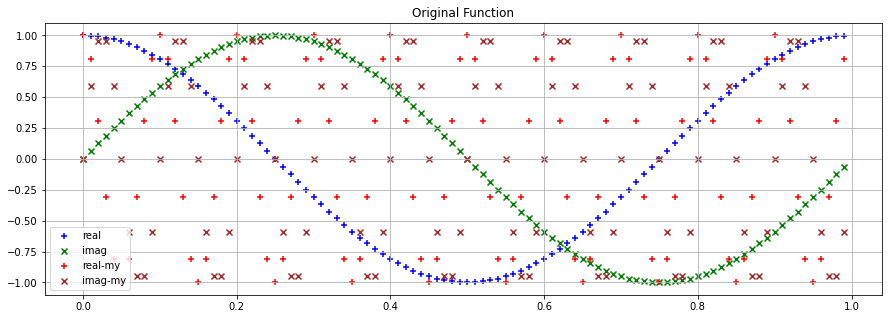

In [78]:
#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

Y = np.exp(1.j * max(yplot) * x * 2 * np.pi) 

#
ax = fig.add_subplot(111)
plt.scatter(x, y.real,color="blue" ,label="real",marker="+")
plt.scatter(x, y.imag,color="green",label="imag",marker="x")

plt.scatter(x, Y.real,color="red" ,label="real-my",marker="+")
plt.scatter(x, Y.imag,color="brown",label="imag-my",marker="x")
#plt.xlim(min(xf),max(xf))
plt.legend()
plt.grid(True)
plt.title("Original Function")



plt.show()

In [83]:
np.absolute(yplot).max()

10.0

- devo creare una funzione, che faccia uso dei dataframe, che sappia calcolarmi la Trasformata di Fourier in modo \textit{intuitivo}
- sfruttare poi quanto fatto per calcolare la trasformata di Fourier della funzione $g_D$ e calcolare la soluzione esatta di scattering da disco di raggio $R$
- attenzione, non so quanto valga di preciso il raggio del mio disco, devo implementare la funzione \textit{approximate} in modo tale poi da definire la funzione che mappa $t\in\left[0,1\right]\rightarrow \mathbf{S}\in\mathbf{R}^2$ e poi approssimarla 

In [23]:
def ciao(x):
    a = x+1
    b = x+2
    return a,b

In [25]:
z = ciao(2)

In [26]:
z

(3, 4)